In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
train=pd.read_csv("/content/SalaryData_Train(1).csv")
test=pd.read_csv("/content/SalaryData_Train(1).csv")

In [3]:
columns=["age","workclass","education","educationno","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","native","Salary"]

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            8155 non-null   int64  
 1   workclass      8155 non-null   object 
 2   education      8154 non-null   object 
 3   educationno    8154 non-null   float64
 4   maritalstatus  8154 non-null   object 
 5   occupation     8154 non-null   object 
 6   relationship   8154 non-null   object 
 7   race           8154 non-null   object 
 8   sex            8154 non-null   object 
 9   capitalgain    8154 non-null   float64
 10  capitalloss    8154 non-null   float64
 11  hoursperweek   8154 non-null   float64
 12  native         8154 non-null   object 
 13  Salary         8154 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 892.1+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            8155 non-null   int64  
 1   workclass      8155 non-null   object 
 2   education      8154 non-null   object 
 3   educationno    8154 non-null   float64
 4   maritalstatus  8154 non-null   object 
 5   occupation     8154 non-null   object 
 6   relationship   8154 non-null   object 
 7   race           8154 non-null   object 
 8   sex            8154 non-null   object 
 9   capitalgain    8154 non-null   float64
 10  capitalloss    8154 non-null   float64
 11  hoursperweek   8154 non-null   float64
 12  native         8154 non-null   object 
 13  Salary         8154 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 892.1+ KB


In [8]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,8155.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,38.341386,10.120064,1119.875276,91.333333,41.103998
std,13.083146,2.522156,7581.087614,407.158387,11.922497
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2824.000000,99.000000


In [9]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,8155.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,38.341386,10.120064,1119.875276,91.333333,41.103998
std,13.083146,2.522156,7581.087614,407.158387,11.922497
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2824.000000,99.000000


In [10]:
train.isnull().sum()

age              0
workclass        0
education        1
educationno      1
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [11]:
test.isnull().sum()

age              0
workclass        0
education        1
educationno      1
maritalstatus    1
occupation       1
relationship     1
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

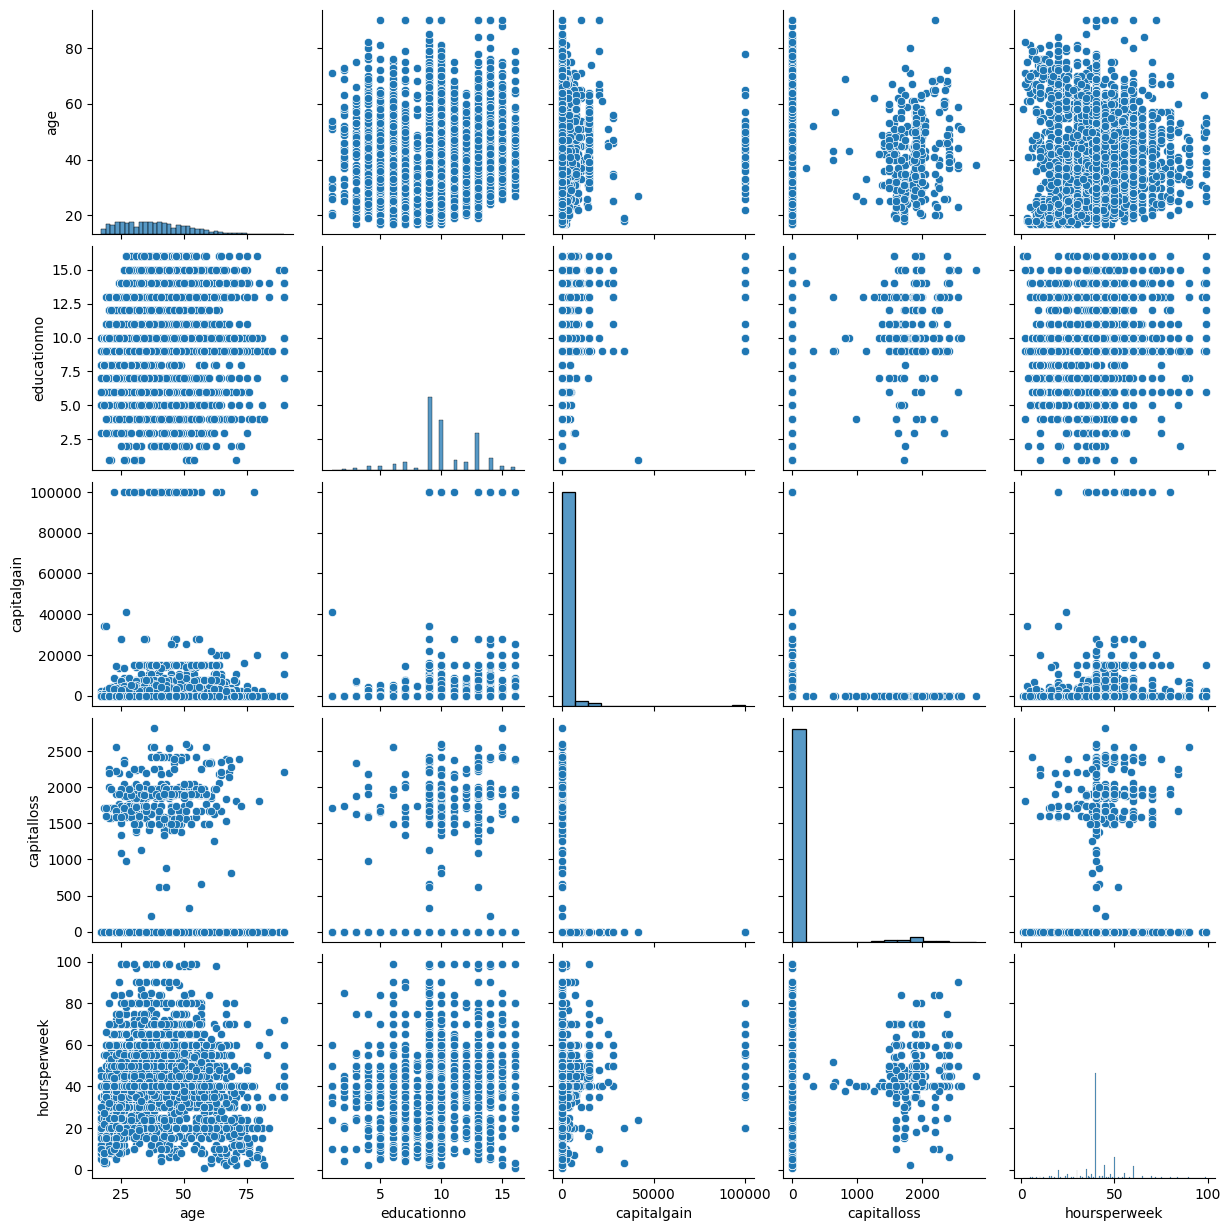

In [12]:
sns.pairplot(train)
plt.show()

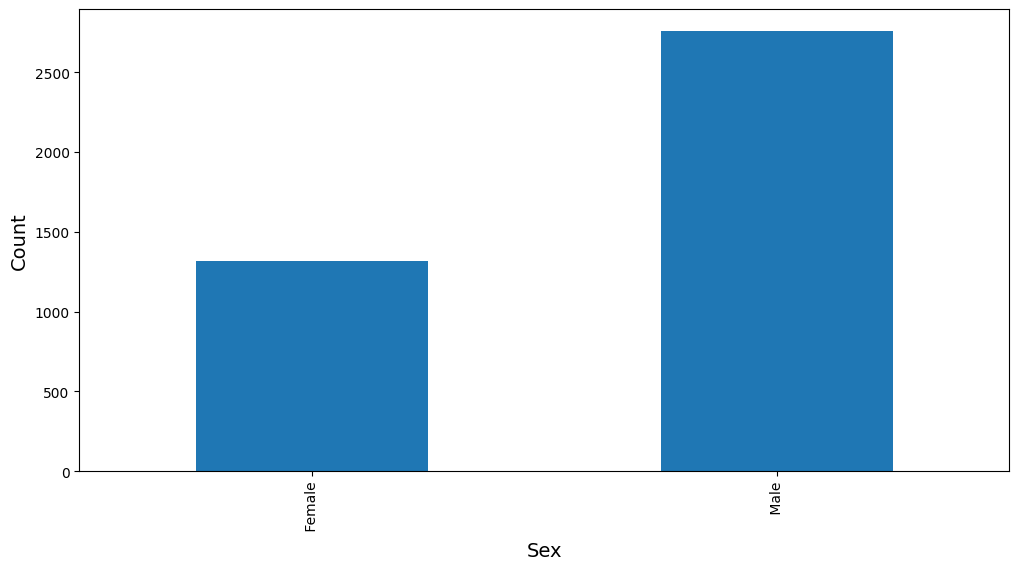

In [13]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

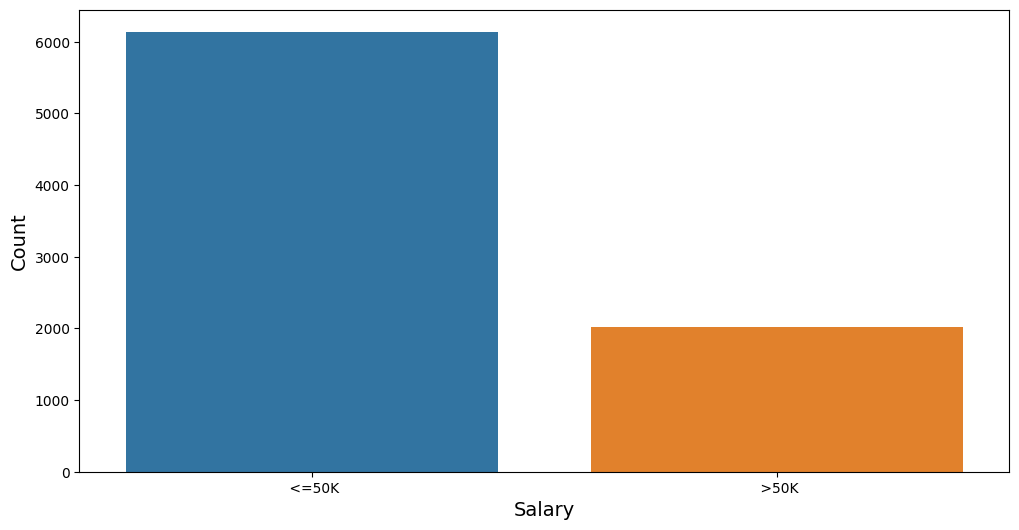

In [14]:
plt.rcParams["figure.figsize"] = (12,6)
sns.countplot(x='Salary', data= train)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

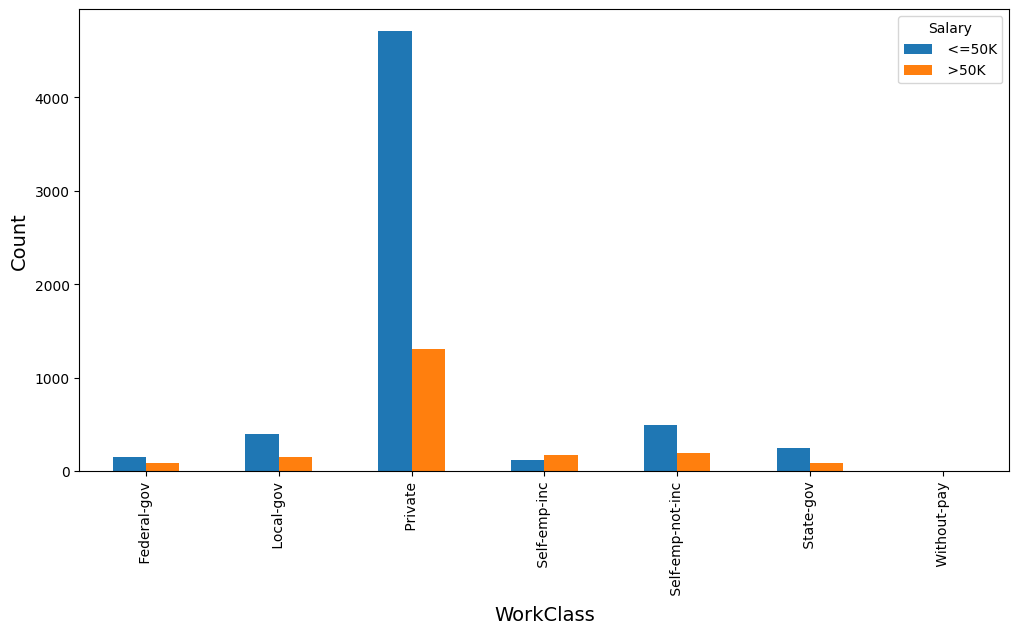

In [15]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train.workclass,train.Salary).plot(kind="bar")
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

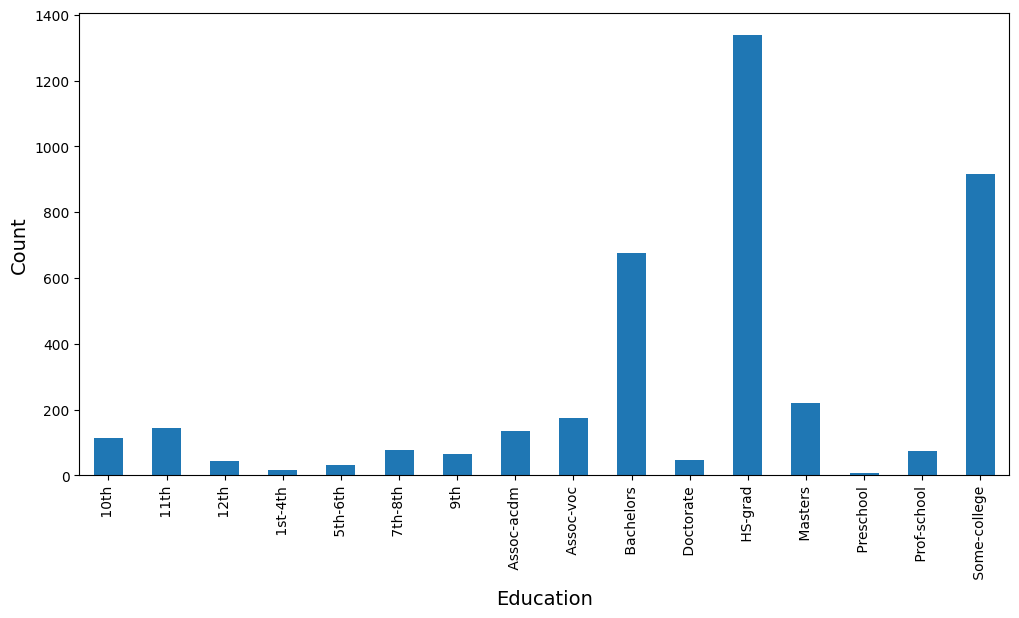

In [16]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

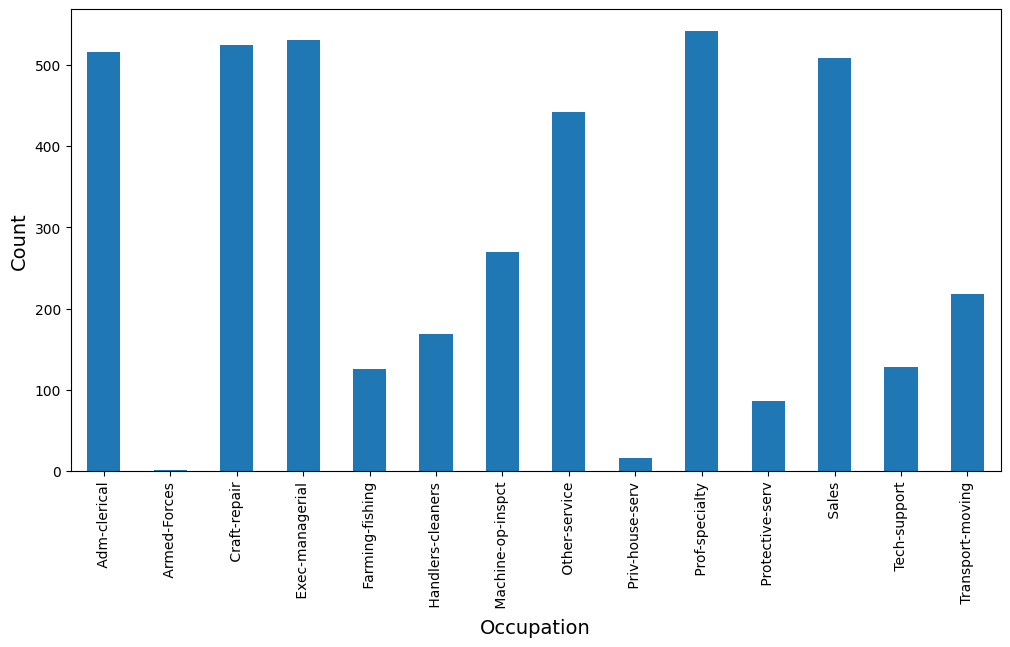

In [17]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train['Salary'],train['occupation']).mean().plot(kind='bar')
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

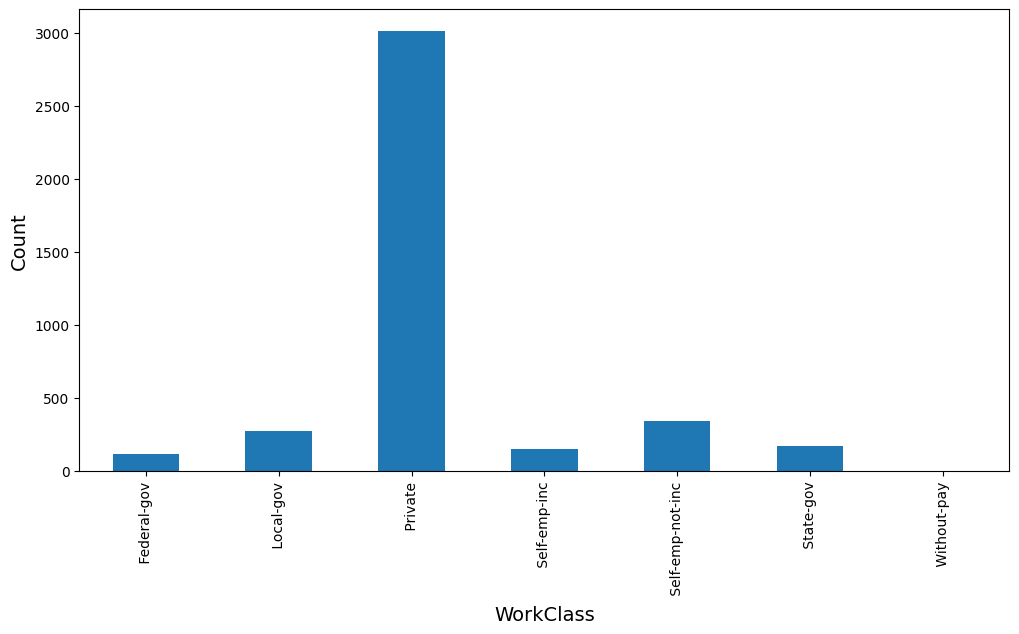

In [18]:
plt.rcParams["figure.figsize"] = (12,6)
pd.crosstab(train['Salary'],train['workclass']).mean().plot(kind='bar')
plt.xlabel('WorkClass', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

<ipython-input-19-7c32c68cbe9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


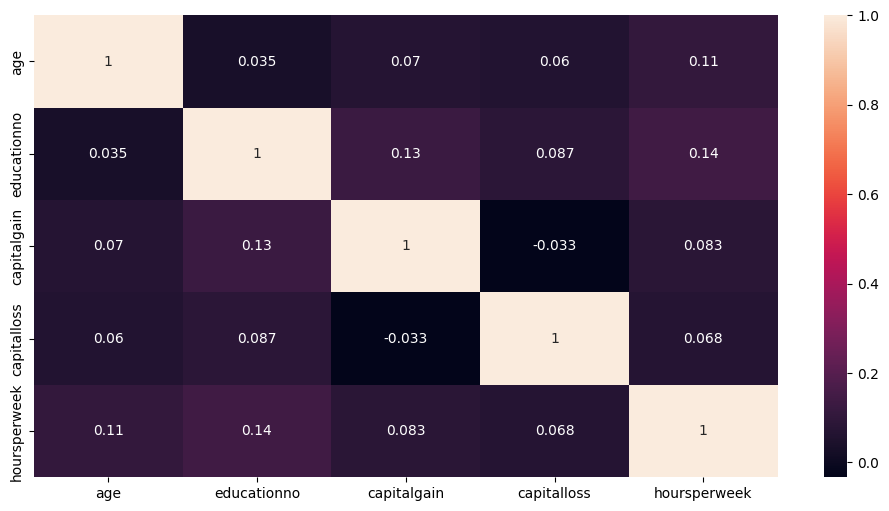

In [19]:
corr = train.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [20]:
le=LabelEncoder()
train= train.apply(le.fit_transform)
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,6,9,12,4,0,1,4,1,15,0,38,37,0
1,33,5,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,38,37,0
3,36,2,1,6,2,5,0,2,1,0,0,38,37,0
4,11,2,9,12,2,9,5,2,0,0,0,38,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8150,30,5,11,8,2,11,0,4,1,0,0,68,37,1
8151,24,2,9,12,2,3,0,4,1,52,0,48,37,1
8152,18,4,11,8,2,3,0,4,1,0,0,48,37,1
8153,7,2,15,9,4,7,3,4,1,0,0,19,1,0


In [21]:
test= test.apply(le.fit_transform)
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,6,9,12,4,0,1,4,1,15,0,38,37,0
1,33,5,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,38,37,0
3,36,2,1,6,2,5,0,2,1,0,0,38,37,0
4,11,2,9,12,2,9,5,2,0,0,0,38,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8150,30,5,11,8,2,11,0,4,1,0,0,68,37,1
8151,24,2,9,12,2,3,0,4,1,52,0,48,37,1
8152,18,4,11,8,2,3,0,4,1,0,0,48,37,1
8153,7,2,15,9,4,7,3,4,1,0,0,19,1,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            8155 non-null   int64
 1   workclass      8155 non-null   int64
 2   education      8155 non-null   int64
 3   educationno    8155 non-null   int64
 4   maritalstatus  8155 non-null   int64
 5   occupation     8155 non-null   int64
 6   relationship   8155 non-null   int64
 7   race           8155 non-null   int64
 8   sex            8155 non-null   int64
 9   capitalgain    8155 non-null   int64
 10  capitalloss    8155 non-null   int64
 11  hoursperweek   8155 non-null   int64
 12  native         8155 non-null   int64
 13  Salary         8155 non-null   int64
dtypes: int64(14)
memory usage: 892.1 KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8155 entries, 0 to 8154
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            8155 non-null   int64
 1   workclass      8155 non-null   int64
 2   education      8155 non-null   int64
 3   educationno    8155 non-null   int64
 4   maritalstatus  8155 non-null   int64
 5   occupation     8155 non-null   int64
 6   relationship   8155 non-null   int64
 7   race           8155 non-null   int64
 8   sex            8155 non-null   int64
 9   capitalgain    8155 non-null   int64
 10  capitalloss    8155 non-null   int64
 11  hoursperweek   8155 non-null   int64
 12  native         8155 non-null   int64
 13  Salary         8155 non-null   int64
dtypes: int64(14)
memory usage: 892.1 KB


In [24]:
x_train = train.drop(['maritalstatus','sex','native','race','relationship','Salary'],axis=1).values
y_train = train['Salary'].values

In [25]:
x_train

array([[22,  6,  9, ..., 15,  0, 38],
       [33,  5,  9, ...,  0,  0, 12],
       [21,  2, 11, ...,  0,  0, 38],
       ...,
       [18,  4, 11, ...,  0,  0, 48],
       [ 7,  2, 15, ...,  0,  0, 19],
       [29,  3, 16, ..., 92, 68, 81]])

In [26]:
y_train

array([0, 0, 0, ..., 1, 0, 2])

In [27]:
x_test = test.drop(['maritalstatus','sex','native','race','relationship','Salary'],axis=1).values
y_test = test['Salary'].values

In [28]:
x_test

array([[22,  6,  9, ..., 15,  0, 38],
       [33,  5,  9, ...,  0,  0, 12],
       [21,  2, 11, ...,  0,  0, 38],
       ...,
       [18,  4, 11, ...,  0,  0, 48],
       [ 7,  2, 15, ...,  0,  0, 19],
       [29,  3, 16, ..., 92, 68, 81]])

In [29]:
y_test

array([0, 0, 0, ..., 1, 0, 2])

In [30]:
for i in columns:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

colnames = train.columns

In [31]:
trainx = train[colnames[0:13]]
trainy = train[colnames[13]]
testx = test[colnames[0:13]]
testy  = test[colnames[13]]

In [32]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [33]:
trainx = norm_func(trainx)
testx =  norm_func(testx)

### 1.Linear SVM

In [34]:
model_linear = SVC(kernel = "linear")
model_linear.fit(trainx,trainy)
pred_test_linear = model_linear.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_linear))

Accuracy: 0.8009809932556714


### 2. Poly SVM

In [35]:
model_poly = SVC(kernel = "poly",gamma="auto")
model_poly.fit(trainx,trainy)
pred_test_poly = model_poly.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_poly))

Accuracy: 0.7964438994481913


### 3.RBF SVM

In [36]:
model_rbf = SVC(kernel = "rbf",gamma="auto")
model_rbf.fit(trainx,trainy)
pred_test_rbf = model_rbf.predict(testx)
print("Accuracy:",metrics.accuracy_score(testy, pred_test_rbf))

Accuracy: 0.804659717964439


In [37]:
model=SVC()
model.fit(trainx,trainy)
pred=model.predict(testx)
print(classification_report(pred,testy))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      6761
           1       0.53      0.77      0.63      1393
           2       1.00      1.00      1.00         1

    accuracy                           0.84      8155
   macro avg       0.83      0.88      0.84      8155
weighted avg       0.88      0.84      0.85      8155

